In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline
plt.style.use('fivethirtyeight')

Collecting the data:

In [69]:
rating_conv = json.load(open('../data_coll/rating_conv.json'))
rev_rating_conv = json.load(open('../data_coll/rev_rating_conv.json'))
routes = pd.read_csv('../data/routes.csv')
users = pd.read_csv('../data/user_ticks.csv', delimiter='|')

Exploration of the `routes` dataframe:

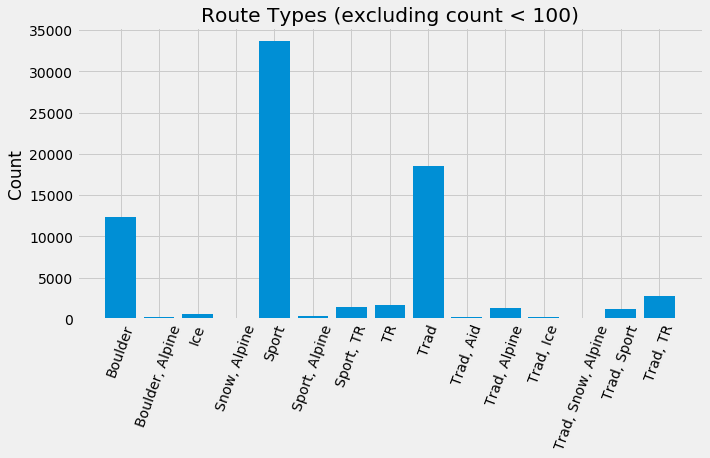

In [189]:
route_types = routes.groupby('type').count()['route_id']
route_types = route_types[route_types > 100]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(route_types.index,route_types.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Types (excluding count < 100)');

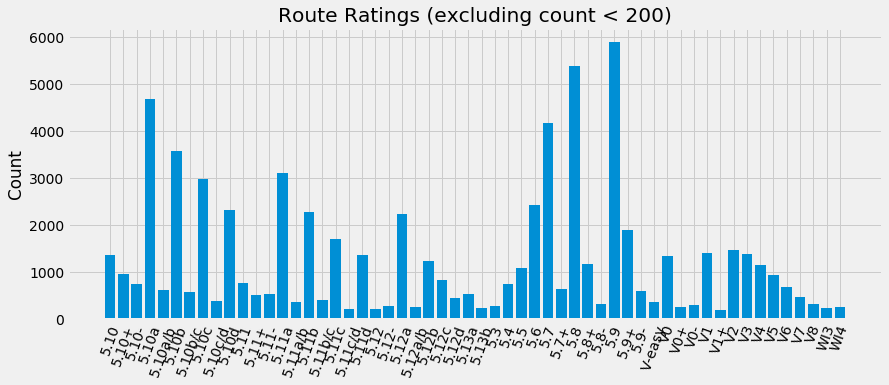

In [190]:
route_ratings = routes.groupby('base_rating').count()['route_id']
route_ratings = route_ratings[route_ratings > 200]

fig, ax = plt.subplots(figsize=(13,5))
ax.bar(route_ratings.index,route_ratings.values);
plt.xticks(rotation=70);
ax.set_ylabel('Count');
ax.set_title('Route Ratings (excluding count < 200)');

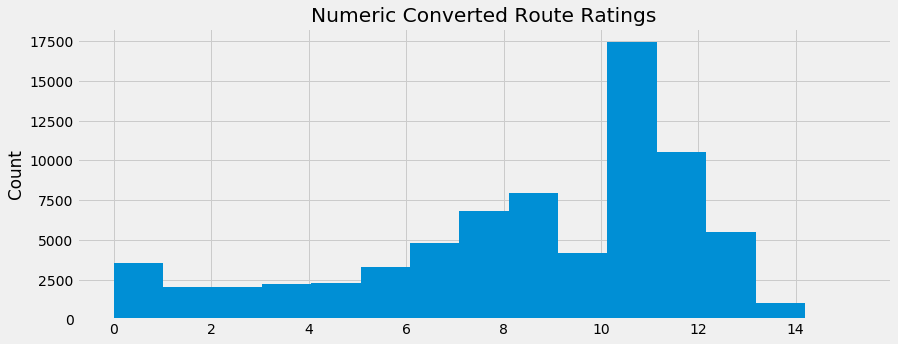

In [187]:
routes_no_nan = routes[
    (routes['base_rating'].str.startswith('5', na=False))
    | (routes['base_rating'].str.startswith('V', na=False))]

fig, ax = plt.subplots(figsize=(13,5))
ax.hist(routes_no_nan['num_rating'], bins=15);
ax.set_ylabel('Count');
ax.set_title('Numeric Converted Route Ratings');

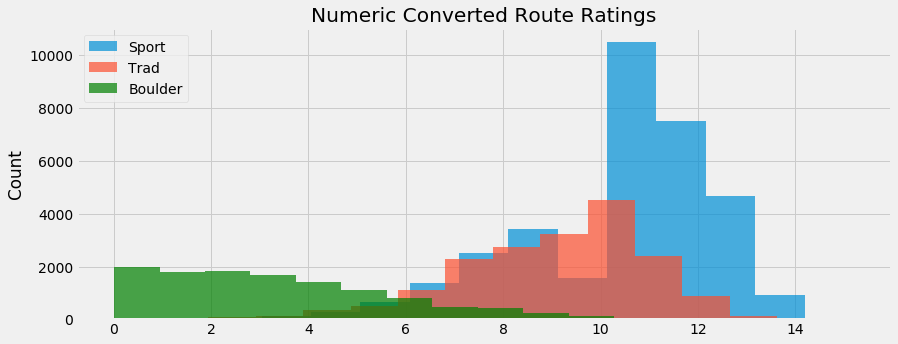

In [188]:
sport_ratings = routes_no_nan[routes_no_nan['type'] == 'Sport']['num_rating']
trad_ratings = routes_no_nan[routes_no_nan['type'] == 'Trad']['num_rating']
boulder_ratings = routes_no_nan[routes_no_nan['type'] == 'Boulder']['num_rating']

fig, ax = plt.subplots(figsize=(13,5))
ax.hist(sport_ratings, bins=15, alpha=.7);
ax.hist(trad_ratings, bins=15, alpha=.7);
ax.hist(boulder_ratings, bins=15, alpha=.7, color='g');
ax.set_ylabel('Count');
ax.set_title('Numeric Converted Route Ratings');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

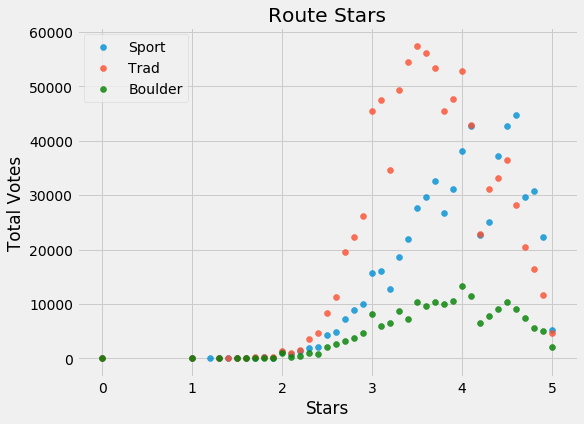

In [212]:
trad_stars = routes[routes['type'] == 'Trad'].groupby('stars').sum()['star_votes']
sport_stars = routes[routes['type'] == 'Sport'].groupby('stars').sum()['star_votes']
boulder_stars = routes[routes['type'] == 'Boulder'].groupby('stars').sum()['star_votes']

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(trad_stars.index, trad_stars.values, alpha=.8);
ax.scatter(sport_stars.index, sport_stars.values, alpha=.8);
ax.scatter(boulder_stars.index, boulder_stars.values, alpha=.8, color='g');
ax.set_ylabel('Total Votes');
ax.set_xlabel('Stars')
ax.set_title('Route Stars');
ax.legend(['Sport','Trad','Boulder'],loc='upper left');

In [202]:
trad_stars.values

array([    0,    55,     5,    32,    26,    81,    51,   113,   224,
         109,  1252,   731,  1328,  1968,  2092,  4380,  4836,  7252,
        8837,  9976, 15697, 16024, 12753, 18614, 21917, 27578, 29681,
       32665, 26764, 31103, 38107, 42645, 22715, 25091, 37183, 42700,
       44695, 29646, 30755, 22385,  5259])